<a href="https://colab.research.google.com/github/SajalSinha/Bike_sharing_demand/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

#Downloading Libraries  

In [166]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [167]:
import numpy as np
import pandas as pd
from numpy import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#Uploading Data

In [168]:
df = pd.read_csv('/content/drive/MyDrive/Capstone Project 2/Bike Sharing Demand Prediction/Data & Resources/SeoulBikeData.csv',encoding = 'latin1')

In [169]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [170]:
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [171]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

#Analyzing and cleaning Data

In [172]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [173]:
df.describe(include='all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,18/03/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#EDA

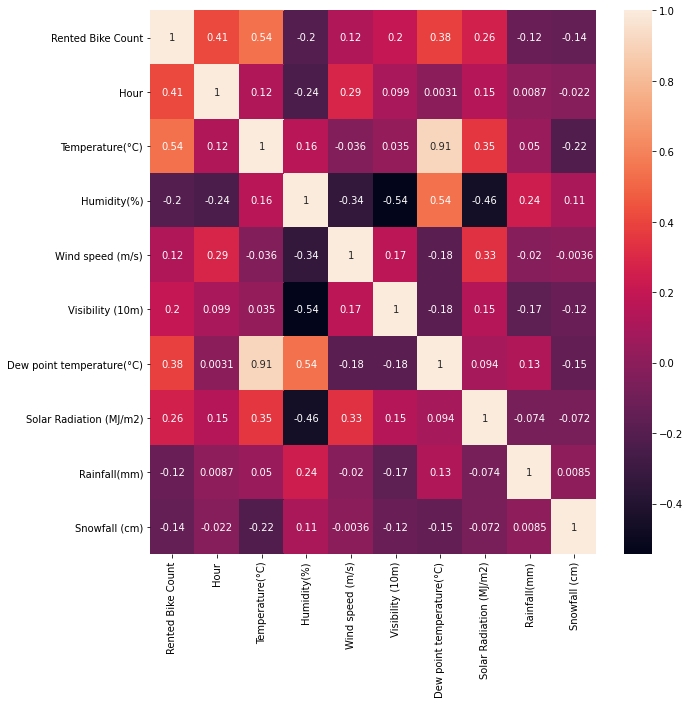

In [175]:
 plt.figure(figsize=(10,10))
 sns.heatmap(df.corr(), annot=True)

Correlation between different variables are shown using heatmap. So, in-order to see if any multi-collinearity exist, we use correlation chart. Values which are close to **1** other than diagonal elements must be checked. In our case **Dew Point Temperature** and **Temperature** have correlation of *0.91* which can be due to the fact that as the mean temperature itself is low (12.882922 C) and dew temperature will be similarly low, so they both can be categorized as *directly propotional*

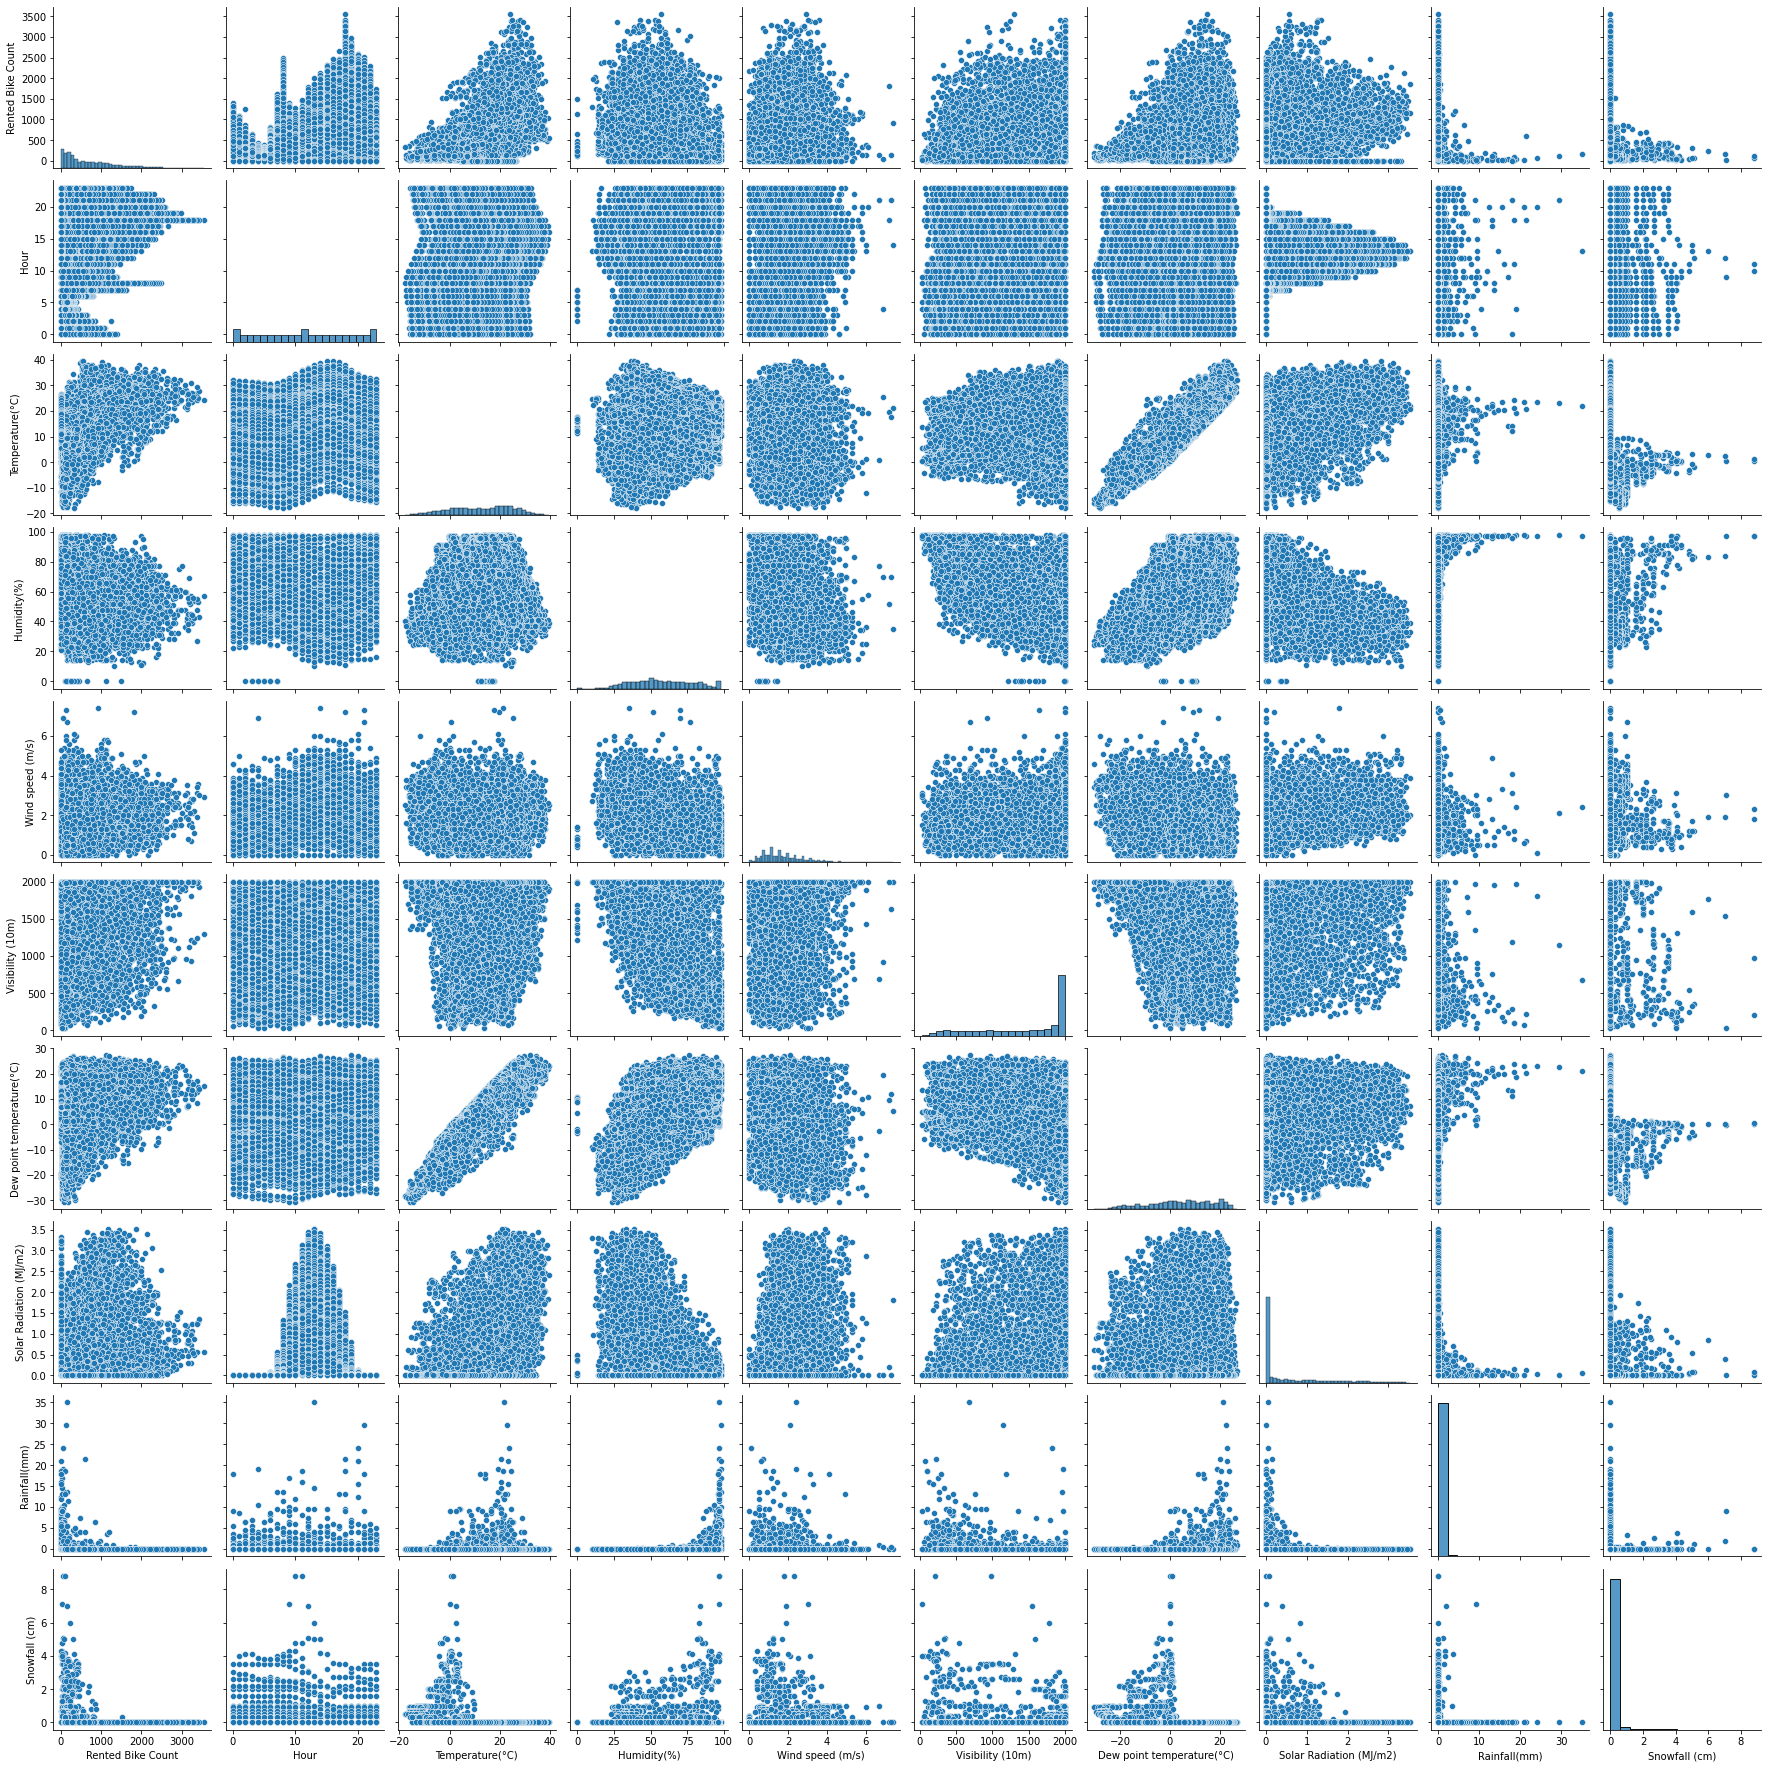

In [176]:
sns.pairplot(df)

Text(0.5, 1.0, 'Comparision of Bike Count with Dew Point Temperature')

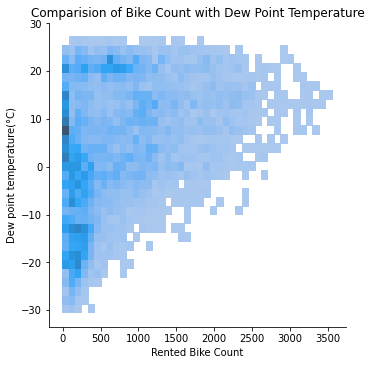

In [177]:
sns.displot(x=df['Rented Bike Count'],y=df['Dew point temperature(°C)'])
plt.title('Comparision of Bike Count with Dew Point Temperature')

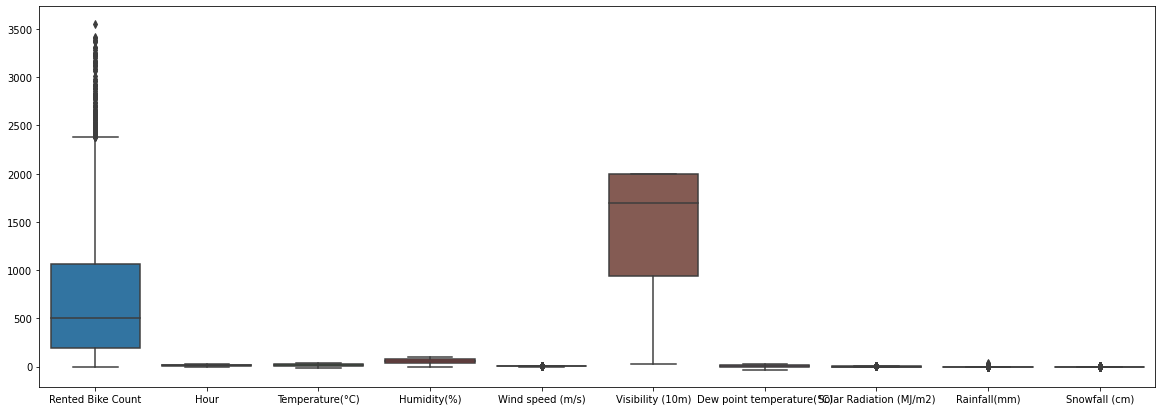

In [178]:
plt.figure(figsize=(20,7))
sns.boxplot(data=df)

In [179]:
df[df['Rented Bike Count']>2500]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
3282,16/04/2018,2692,18,17.0,28,3.1,2000,-1.6,0.88,0.0,0.0,Spring,No Holiday,Yes
3498,25/04/2018,2807,18,21.2,32,3.8,1927,3.8,0.94,0.0,0.0,Spring,No Holiday,Yes
3522,26/04/2018,2574,18,17.4,45,3.1,1092,5.3,0.75,0.0,0.0,Spring,No Holiday,Yes
3546,27/04/2018,2577,18,20.3,47,2.5,705,8.6,0.77,0.0,0.0,Spring,No Holiday,Yes
3618,30/04/2018,2558,18,23.0,54,2.9,679,13.1,0.81,0.0,0.0,Spring,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7674,16/10/2018,2716,18,16.9,47,1.4,1637,5.5,0.11,0.0,0.0,Autumn,No Holiday,Yes
7746,19/10/2018,2631,18,16.6,40,2.4,2000,2.9,0.11,0.0,0.0,Autumn,No Holiday,Yes
7818,22/10/2018,2613,18,17.3,43,0.9,783,4.5,0.08,0.0,0.0,Autumn,No Holiday,Yes
7866,24/10/2018,2612,18,15.1,53,1.7,2000,5.5,0.06,0.0,0.0,Autumn,No Holiday,Yes


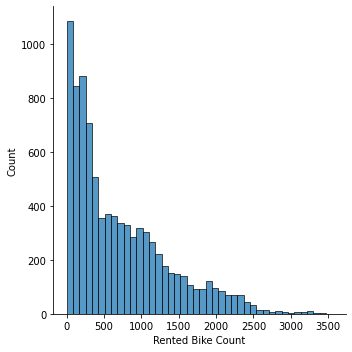

In [180]:
sns.displot(df['Rented Bike Count'])

Text(0.5, 1.0, 'Comparision of Bike Count with Temperature')

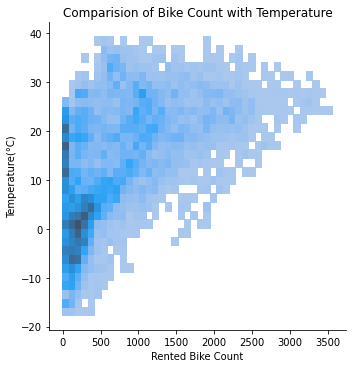

In [181]:
sns.displot(y=df['Temperature(°C)'],x=df['Rented Bike Count'])
plt.title('Comparision of Bike Count with Temperature')

From both the displot we can easily say **warmer the weather, more the count**

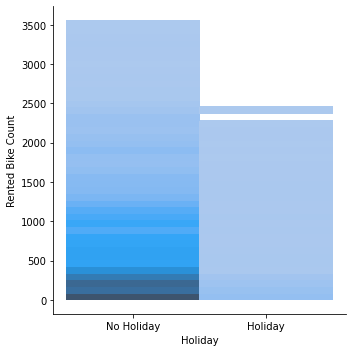

In [182]:
sns.displot(x=df['Holiday'],y=df['Rented Bike Count'])

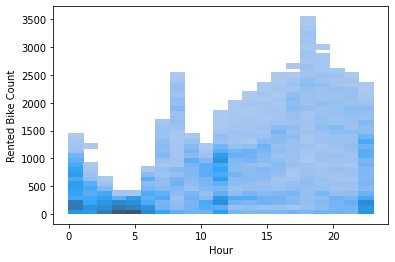

In [183]:
sns.histplot(y=df['Rented Bike Count'],x=df['Hour'])

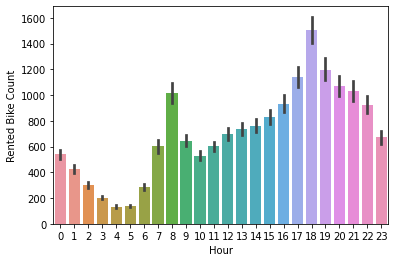

In [184]:
sns.barplot(x=df['Hour'],y=df['Rented Bike Count'])

**The Most busiest/preferable time of bike renting is 6pm (18:00) to 8 pm (20:00)**

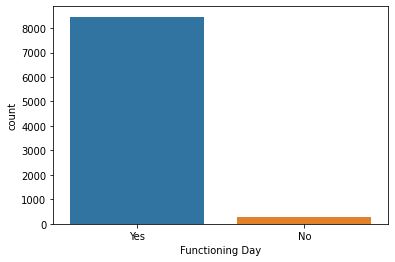

In [185]:
sns.countplot(df['Functioning Day']) 

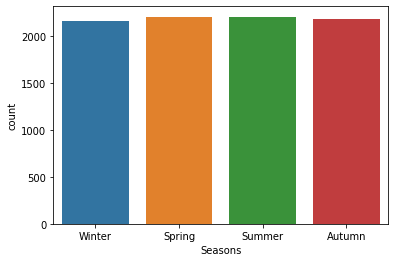

In [186]:
sns.countplot(df['Seasons'])

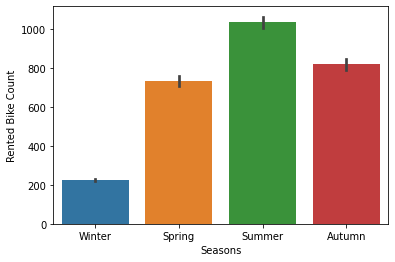

In [187]:
sns.barplot(x=df['Seasons'],y=df['Rented Bike Count'])

**Bikes are rented more during summer season**

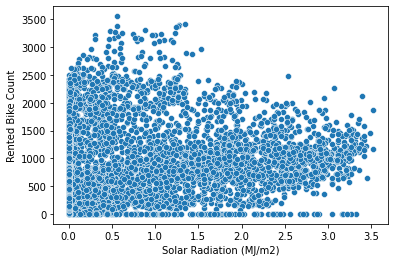

In [188]:
sns.scatterplot(x=df['Solar Radiation (MJ/m2)'],y=df['Rented Bike Count'])

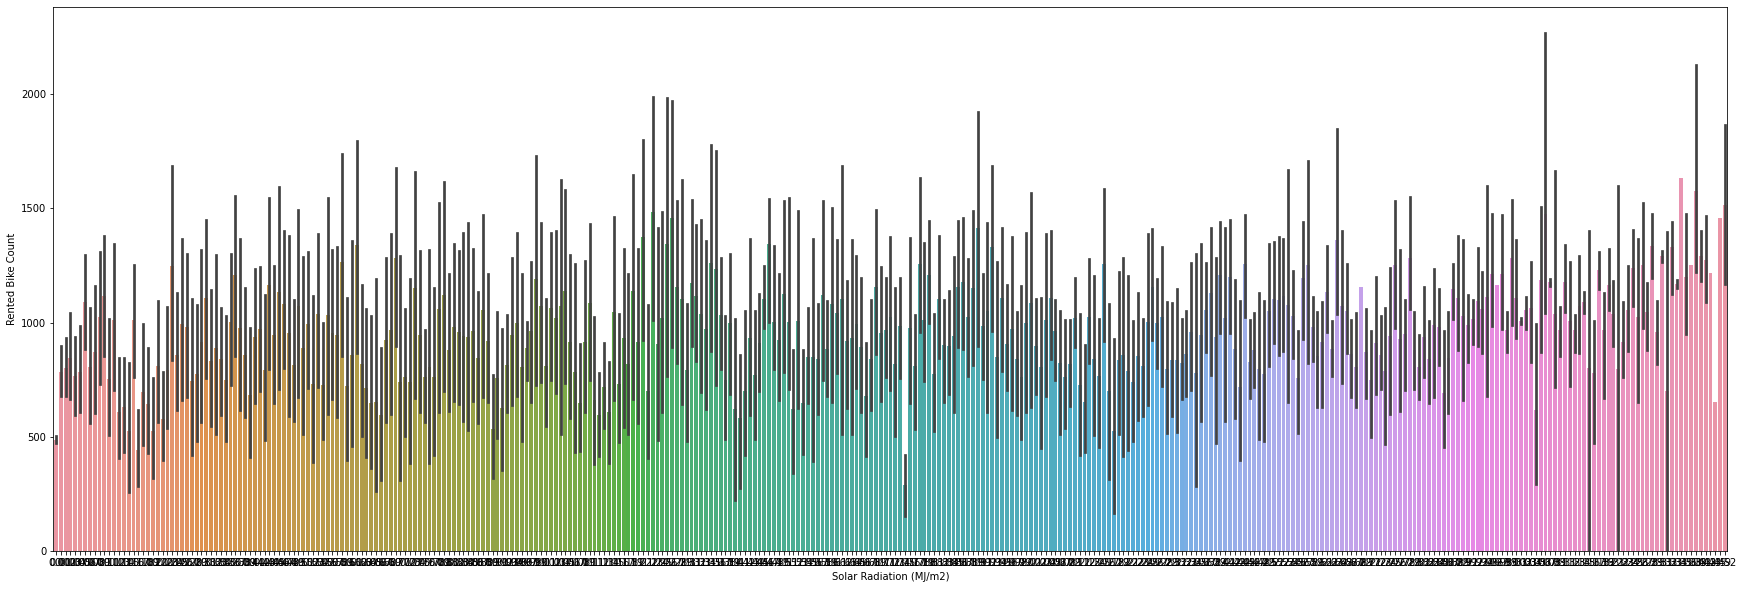

In [189]:
plt.figure(figsize=(30,10))
sns.barplot(x=df['Solar Radiation (MJ/m2)'],y=df['Rented Bike Count'])

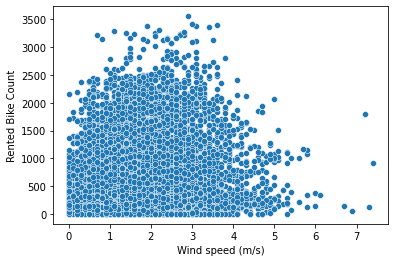

In [190]:
sns.scatterplot(x =df['Wind speed (m/s)'],y=df['Rented Bike Count'])

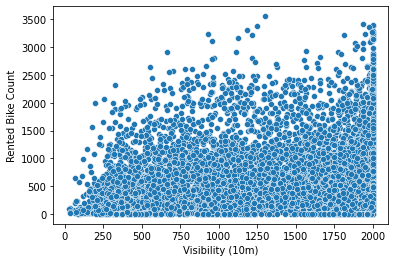

In [191]:
 sns.scatterplot(x =df['Visibility (10m)'],y=df['Rented Bike Count'])

#To Get Data Ready for model

In [192]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [193]:
df.drop(['Solar Radiation (MJ/m2)'],axis=1,inplace=True)

In [194]:
df['Rainfall(mm)'] = np.where(df['Rainfall(mm)']>=0,1,0)
df['Snowfall (cm)'] = np.where(df['Snowfall (cm)']>=0,1,0)
encoders_nums = {"Functioning Day":{"Yes":1,"No":0}}
df = df.replace(encoders_nums)

In [195]:
dummy = pd.get_dummies(df['Seasons'])
dummy_1 = pd.get_dummies(df['Holiday'])
df = pd.concat([df,dummy,dummy_1],axis=1)

In [196]:
df.drop(['Seasons'],axis=1,inplace=True)

In [197]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Autumn,Spring,Summer,Winter,Holiday,No Holiday
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,1,1,No Holiday,1,0,0,0,1,0,1
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,1,1,No Holiday,1,0,0,0,1,0,1
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,1,1,No Holiday,1,0,0,0,1,0,1
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,1,1,No Holiday,1,0,0,0,1,0,1
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,1,1,No Holiday,1,0,0,0,1,0,1


In [201]:
df.drop(df['Holiday'],axis=1,inplace=True)

In [202]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Rainfall(mm),Snowfall (cm),Functioning Day,Autumn,Spring,Summer,Winter,No Holiday
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,1,1,1,0,0,0,1,1
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,1,1,1,0,0,0,1,1
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,1,1,1,0,0,0,1,1
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,1,1,1,0,0,0,1,1
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,1,1,1,0,0,0,1,1


In [ ]:
# import pandas as pd

# def clean_dataset(df):
#     assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
#     df.dropna(inplace=True)
#     indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
#     return df[indices_to_keep].astype(np.float64)

In [236]:
df.isnull().sum()

index                        0
Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Rainfall(mm)                 0
Snowfall (cm)                0
Functioning Day              0
Autumn                       0
Spring                       0
Summer                       0
Winter                       0
No Holiday                   0
dtype: int64

In [203]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Functioning Day', 'Autumn', 'Spring',
       'Summer', 'Winter', 'No Holiday'],
      dtype='object')

In [207]:
X = df[['Hour', 'Temperature(°C)', 'Humidity(%)','Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)','Rainfall(mm)', 'Snowfall (cm)', 'Functioning Day', 'Autumn', 'Spring','Summer', 'Winter', 'No Holiday']]
y = df['Rented Bike Count']

#Implementation

In [208]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y, test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(7008, 14)
(1752, 14)


In [215]:
from sklearn.linear_model import LinearRegression 

lm = LinearRegression() 

lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [216]:
print(lm.intercept_)

-17.354231126187415


In [218]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Hour,2.795855e+01
Temperature(°C),-7.998333e-01
Humidity(%),-1.316292e+01
Wind speed (m/s),5.570957e+00
Visibility (10m),3.993031e-02
Dew point temperature(°C),2.562935e+01
Rainfall(mm),-1.367795e-13
Snowfall (cm),-3.268497e-13
Functioning Day,9.308196e+02
Autumn,1.587690e+02


In [219]:
predictions = lm.predict(X_test)

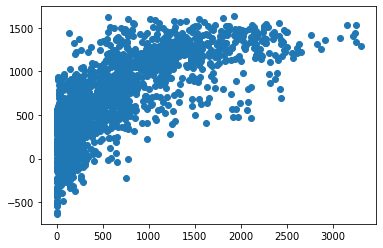

In [220]:
plt.scatter(y_test,predictions)

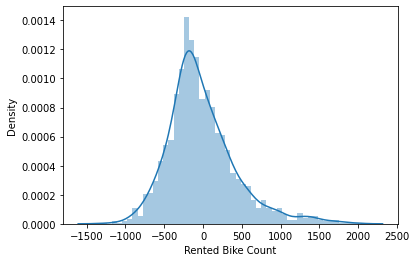

In [221]:
sns.distplot((y_test-predictions),bins=50);

In [222]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions)) 
print('MSE:', metrics.mean_squared_error(y_test, predictions)) 
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 334.09245323934505
MSE: 198015.73223148033
RMSE: 444.989586655104


In [234]:
df = df.reset_index()

In [237]:
from sklearn.metrics import r2_score
r2 = r2_score((y_test),(y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.5268696655949412
Adjusted R2 :  0.5230562950240312
